# MBTI Types of the StackOverflow Users

In this part, we are going to analyze how different MBTI types are expressed in the StackOverflow site. 

For short description of the MBTI types you can go to: http://understandmyersbriggs.blogspot.co.at/p/description-of-8-letters.html or http://www.myersbriggs.org/my-mbti-personality-type/mbti-basics/the-16-mbti-types.htm

If you want to test yourself, I prefer test on Dario Nardi's site: http://www.keys2cognition.com/explore.htm , but there is a short quiz http://www.blogthings.com/howrareisyourpersonalityquiz/

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import chi2_contingency
from collections import defaultdict
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import math
import csv
%matplotlib inline

We are going to be researching only 7 languages, because these are the langauges that we are the most interested in. There are simply here because we will need them later on.

In [2]:
languages = ["c++", "c", "c#", "java", "python", "r", "lisp"]

We have generated the csv data, where the first colum was the ID od the questions on the stackoverflow, the second one was the MBTI type and the third one was programming language that we got from tags used with the question.

In [3]:
with open("StackOverflow/MBTI-Questions.csv", "r") as read:
    questions_data = pd.read_csv(read, sep=",", header=None, names=["ID", "Type", "Language"])

In [4]:
questions_data.head()

,ID,Type,Language
0,467110,INTJ,r
1,520810,ESFJ,r
2,657440,ENTJ,r
3,1098210,ISTJ,r
4,1163640,INTJ,r


Now we are going to group this data based on their MBTI types. This way we will be able to see which types post more often on the Stackoverflow. 

If we assume that the distribution of the programmers is the same as the distribution of the people posting on Stackoverflow, we can also get which types more frequently decide to take programming. This is the assumption that we are going to be using in the following analysis.

In [5]:
types_all_questions = questions_data["Type"].value_counts()

In [6]:
types_all_questions

ISTJ    758
ESFJ    667
INTJ    569
INTP    432
ESTJ    239
ENTJ    181
ESTP    147
ESFP    136
ISTP     82
INFP     81
ENFJ     66
ISFJ     51
INFJ     45
ISFP     31
ENTP     16
ENFP      6
Name: Type, dtype: int64

As we can see from the graph below, types like ISTJ, ESFJ, INTJ and INTP are much more likely to program than other types. While ENFP and ENTP are less likely to program. 

This almost agree with the general notion in the MBTI community, where ISTJ, ISTP, INTJ and INTP are considered the types most likely to program. Not sure what the ESFJ is doing there, though. 

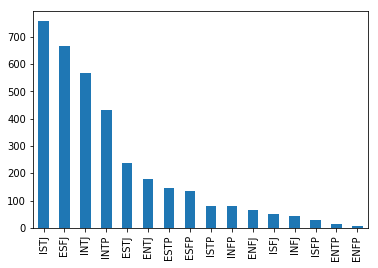

In [7]:
types_all_questions.plot(kind="bar")

Next we are going to group data by the langauge use and create frequency table (programming langauge x MBTI type). 

For this we are going to first groups the data and collected all the data by specific language in the list. 

In [8]:
questions_grouped_by_language = questions_data.groupby("Language")

In [9]:
all_grouped_languages = []

In [10]:
for language in languages:
    group = questions_grouped_by_language.get_group(language)
    all_grouped_languages.append(group["Type"].value_counts())

Now we are going to put all these seperate data in one pandas data frame. 

In [11]:
type_languages_comparison = pd.concat(all_grouped_languages, axis=1)

In [12]:
type_languages_comparison.columns = languages

In [13]:
type_languages_comparison

,c++,c,c#,java,python,r,lisp
ENFJ,9.0,9,10.0,7.0,16,8.0,7
ENFP,NaN,1,NaN,NaN,3,NaN,2
ENTJ,26.0,22,29.0,30.0,24,29.0,21
ENTP,3.0,4,1.0,NaN,1,2.0,5
ESFJ,96.0,80,87.0,92.0,108,96.0,108
ESFP,15.0,18,23.0,23.0,13,25.0,19
ESTJ,41.0,28,40.0,53.0,24,28.0,25
ESTP,19.0,19,12.0,3.0,13,36.0,45
INFJ,4.0,3,7.0,11.0,9,2.0,9
INFP,11.0,10,10.0,16.0,6,15.0,13


As you can see above, we now have the data in the data frame. But there are some NaNs, where we had no data and the data is expressed in floats, even though they are count data and with that integers. So we are going to change NaNs to 0 and all the numbers to int type.

In [14]:
type_languages_comparison = type_languages_comparison.fillna(0)

In [15]:
type_languages_comparison = type_languages_comparison.astype(int)

In [16]:
type_languages_comparison

,c++,c,c#,java,python,r,lisp
ENFJ,9,9,10,7,16,8,7
ENFP,0,1,0,0,3,0,2
ENTJ,26,22,29,30,24,29,21
ENTP,3,4,1,0,1,2,5
ESFJ,96,80,87,92,108,96,108
ESFP,15,18,23,23,13,25,19
ESTJ,41,28,40,53,24,28,25
ESTP,19,19,12,3,13,36,45
INFJ,4,3,7,11,9,2,9
INFP,11,10,10,16,6,15,13


Now that we have the data in the right form, we can plot it to see if there are any differences. We can see for example, that INTJ types are more likely to use R, while ISTJ types are less likely to use it. Java is quite popular with ESTJs and ISTPs, but not with ESTPs, and so on. 

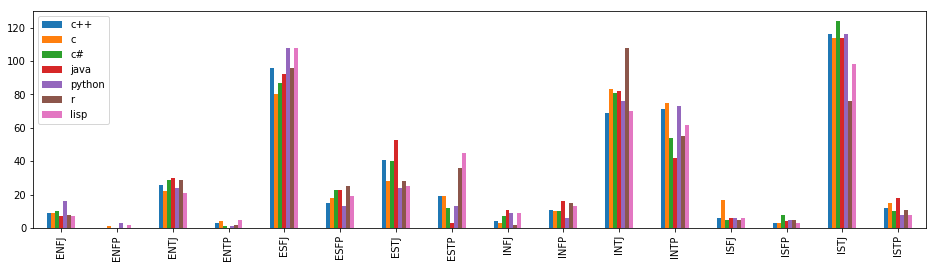

In [17]:
type_languages_comparison.plot(kind="bar", figsize=(16,4))

In order to see if there are also statistical differences in these langauges, we are going to be using chi-square method. 

The chi-square method from scipy outputs the chi2, p, degrees of freedom and expected frequencies.

<font color="blue">The Chi-square test is used to compare if groups are the same across the conditions. It is normally used to see, if there is any difference in the groups, when we devide them based on multiple criteria: for example if they are smoking and gender.</font>
<br><br>
<font color="blue">In the Chi-square test, the null hypotesis that we are trying to reject is that there is no difference i between the groups. If we can reject this, then there is a difference between at least two of the groups across the conditions.</font>
<br><br>
<font color="blue">Because we are in the social domain, we are after all studying the human behaviour in a way, we are going to be using the p<.05, which is the stanard in the social sciences.</font>

In [18]:
chi2_questions, p_questions, dof_questions, res_questions = chi2_contingency(type_languages_comparison, correction=True)

In [19]:
chi2_questions, p_questions

(207.54972462959995, 2.8128161561126385e-11)

Considering the p is very low, we can conclude that they people's types influence the programing language that they are using.

Now we are going to make the expected frequency table more pretier, because we are going to be using it to calculate residuals.

In [20]:
res_questions = pd.DataFrame(res_questions).astype(float)

In [21]:
res_questions.columns = languages

In [22]:
res_questions.index = ["ENFJ", "ENFP", "ENTJ", "ENTP", "ESFJ", "ESFP", "ESTJ", "ESTP", "INFJ", "INFP", 
                       "INTJ", "INTP", "ISFJ", "ISFP", "ISTJ", "ISTP"]

Based on the Donald Sharpe's 2015 paper titled: Your Chi-Square Test is Statistically Significant: Now What? ( http://pareonline.net/getvn.asp?v=20&n=8 ), we calculated the standard residuals based on the following formula:

$residual = (observed - expected) \sqrt{expected}$


In [23]:
comparison_questions = (res_questions - type_languages_comparison.astype(float))/np.sqrt(type_languages_comparison.astype(float))

Here, we are defining the function, that will make it easier to locate the values that are actually different than the norm. Infinite value means we devided with 0, and that happened when we had no data, so this is yellow. Green combinations are the ones that are more likely, and red combinations are the ones that are less likely. 

2 is just an arbitraty number. 1 produced too many colred values, so I used 2. 

In [24]:
def color_negative_red(number):
    if number == math.inf:
        color = "yellow"
    elif number < -2:
        color = "green"
    elif number > 2:
        color = "red"
    else:
        color = "white"
    return 'background-color: %s' % color

In [25]:
comparison_questions.style.applymap(color_negative_red)

<font color="blue">We have picked the number 2 randomly, but it still gives some indication in the way the programming languages are used accross the types.</font>
<br><br>
<font color="blue">For example, we can see from the data, that ESTP type is the most likely to be unconventional in their type choice, as for the most of the programming languages their decisions are different from what was expected on avreage. They are much more likely to use r and lisp, and much less likely to use python, C#, and Java.</font>
<br><br>
<font color=blue>On the other hand, types like ISFP, ESFJ, ENTJ, and some others are quite conventional in their choice of programming languages, as we can not see any sharp deviation in either direction.</font>
<br><br>
<font color="blue">We can also look from the program prespective. For example, people using the ESTJ type are much more likely to pick up Java. On the other hand, ESTPs and INTPs are much less likely to pick up Java, as compared to the avreage one. The higher the absolute number, the higher the deviation.</font>
<br><br>
<font color="blue">One can see these differences also on the graph. For ESTJ type, the red line representing Java is the higest. Just like for the INTJ the brown line representing R is the higest. But the red line representing Java is the smallest for the ESTP group.</font>
<br><br>
<font color="blue">If I would pick 0 for a barrier, and not 2, then I would have every single cell colored, whenever the type is at least a little more or at least a little less likely to use a language. But I thought that the bigger deviations are going to be more interesting.</font>
<br><br>
<font color="blue">The yellow cells simply means that we had no data for this one. This is why we ended up deviding with 0. Comparing it with the table above shows that the yellow cells were the ones that on the beginning had NaN, which we replaced with 0.</font>

Next we are going to be analyzing the answers of the StackOverflow.

First we are going to load the data, that was prepared. In this file the first column in the question ID and the second one is the MBTI type of the person who answered.

In [26]:
with open("StackOverflow/MBTI-Answers.csv", "r") as read:
    answers_data = pd.read_csv(read, sep=",", header=None, names=["Question", "Type"])

Let us first compare which people are answering the questions. So we are going to group the data by the MBTI type.

In [27]:
types_all_answers = answers_data["Type"].value_counts()

If we compare the following graph with the one based on the questions, there are some small differences in ranking. But in most cases, it is between the types that have similar number of questions or answers posted. For example, between ESFP and ESTP.

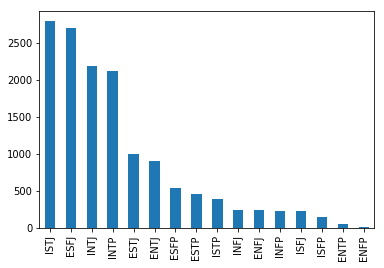

In [28]:
types_all_answers.plot(kind="bar")

In the next part, we are going to try to predict people with which MBTI type are going to answer the question. 

In order to do this, we are going to first format the answers for preparation in later putting it togehter. We are going to rename the column and put the id as an index.

In [29]:
answers_data.columns = ["Question", "Answer Type"]

In [30]:
questions_data = questions_data.set_index("ID")

Next, we are going to get all the Question ids, that we have the answers for. These also gives us ids of the questions for which we have the MBTI type of the person asking the questions as well.

In [31]:
question_id_interest_only = answers_data["Question"]
question_id_interest_only = set(question_id_interest_only)

In [32]:
questions_data.head()

,Type,Language
ID,,
467110,INTJ,r
520810,ESFJ,r
657440,ENTJ,r
1098210,ISTJ,r
1163640,INTJ,r


Next, we are going to grab the question file and import it here.

In [33]:
with open("StackOverflow/Questions.csv", "r", -1, "latin-1") as read:
    questions_data_full = pd.read_csv(read, sep=",")

<font color="blue">The Score column refers to the calcuation based on the voting actions. On StackOverflow, each questions and answer can get voted by user. For each upvote, they get +1 and for each downvote they get the -1. These values are then summed to get the score of the questions or an answer. In this case we are having he score of the question.</font>

In [34]:
questions_data_full.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


Since we are only interested in the answers, where the langauge in question is used and we have the MBTI data for, we are going to filter this, so it only contains the questions we are interested in.

In [35]:
questions_data_full = questions_data_full[questions_data_full["Id"].isin(question_id_interest_only)]

There are some cells that we are not going to be using, so we might as well delete them. 

In [36]:
del questions_data_full["OwnerUserId"]
del questions_data_full["ClosedDate"]

Next we are removing the HTML tags from the text of the question.

In [37]:
questions_data_full.Body = questions_data_full.Body.map(lambda a: BeautifulSoup(a, 'html.parser').get_text())

Next we are counting the number of words in the question and the number of letter in the title of the question. And after that we remove the columns with the text and title of the question.

In [38]:
questions_data_full["BodyLen"] = questions_data_full.Body.map(lambda a: len(a.split(" ")))

In [39]:
questions_data_full["TitleLen"] = questions_data_full.Body.map(lambda a: len(a))

In [40]:
del questions_data_full["Title"]
del questions_data_full["Body"]

Next we are creating the new features from the day and time information that we have. Instead of having a creation date exact to the minute, we would rather have the part of the day, which we will express in hours of the day and which day of the week it is. After that we will delete the creation day column.

In [41]:
questions_data_full['CreationDate'] =  pd.to_datetime(questions_data_full['CreationDate'])

In [42]:
questions_data_full['Hours'] = questions_data_full['CreationDate'].dt.hour

In [43]:
questions_data_full['DayOfTheWeek'] = questions_data_full['CreationDate'].dt.dayofweek

In [44]:
del questions_data_full['CreationDate']

Next we are going to put the id od the question as an index of the data frame.

In [45]:
questions_data_full = questions_data_full.set_index("Id")

In [46]:
questions_data_full.head()

,Score,BodyLen,TitleLen,Hours,DayOfTheWeek
Id,,,,,
260,49,168,1035,23,4
330,29,166,947,2,5
650,79,144,799,11,6
930,28,17,84,0,0
1010,14,90,582,3,0


Next we are going to be merging the question data with the langauge and MBTI data, which is in a different data frame.

In [47]:
questions_data_con = pd.merge(questions_data_full, questions_data, left_index=True, right_index=True)

In [48]:
questions_data_con.head()

,Score,BodyLen,TitleLen,Hours,DayOfTheWeek,Type,Language
260,49,168,1035,23,4,ISTJ,c#
330,29,166,947,2,5,ISTJ,c++
650,79,144,799,11,6,INTJ,c#
930,28,17,84,0,0,ESFJ,c#
1010,14,90,582,3,0,ESTJ,c#


After that we are adding the question data to the answer data frame.

In [49]:
all_data = pd.merge(answers_data, questions_data_con, left_index=False, left_on="Question", right_index=True)

In [50]:
all_data.head()

,Question,Answer Type,Score,BodyLen,TitleLen,Hours,DayOfTheWeek,Type,Language
0,260,ESFJ,49,168,1035,23,4,ISTJ,c#
1,260,INTJ,49,168,1035,23,4,ISTJ,c#
3,260,ESFP,49,168,1035,23,4,ISTJ,c#
4,260,ESFJ,49,168,1035,23,4,ISTJ,c#
36,260,ESFJ,49,168,1035,23,4,ISTJ,c#


Since the question id was only needed for merging, and it is not needed anymore, we can remove it.

In [51]:
del all_data["Question"]

Next we need to scale the data. The numerical variables were scalled in accordance to the MinMax method that is described on https://www.analyticsvidhya.com/blog/2016/07/practical-guide-data-preprocessing-python-scikit-learn/ . 

$X_new = \frac{X - X_min}{X_max - X_min}$

<font color="blue">We are scaling and dummifing the data, because we  want to make the data comparable. We don't want for a value to have a higher weight simply because it has a higher range. Also, upon some reading, it seems that sklearn libary is not really good at dealing with the mix of unscaled data and categories. The reason is that all of the methods are based on the matrix manipulation from the scipy libary, and if we don't scale and dummify the data ourselves, then the algoritm will simply make a guess and put it in the same matrix anyway.</font>

In [52]:
all_data["Score"] = all_data["Score"].map(lambda a: (a-all_data["Score"].max())/(all_data["Score"].max() - all_data["Score"].min()))

In [53]:
all_data["BodyLen"] = all_data["BodyLen"].map(lambda a: (a-all_data["BodyLen"].max())/(all_data["BodyLen"].max() - all_data["BodyLen"].min()))

In [54]:
all_data["TitleLen"] = all_data["TitleLen"].map(lambda a: (a-all_data["TitleLen"].max())/(all_data["TitleLen"].max() - all_data["TitleLen"].min()))

In [55]:
all_data.head()

,Answer Type,Score,BodyLen,TitleLen,Hours,DayOfTheWeek,Type,Language
0,ESFJ,-0.98453,-0.966049,-0.963741,23,4,ISTJ,c#
1,INTJ,-0.98453,-0.966049,-0.963741,23,4,ISTJ,c#
3,ESFP,-0.98453,-0.966049,-0.963741,23,4,ISTJ,c#
4,ESFJ,-0.98453,-0.966049,-0.963741,23,4,ISTJ,c#
36,ESFJ,-0.98453,-0.966049,-0.963741,23,4,ISTJ,c#


Next we are going to put the categorical values as a dummy values.

In [56]:
data_for_analysis = pd.get_dummies(all_data, columns=["Hours", "DayOfTheWeek", "Type", "Language"])

In [57]:
data_for_analysis.head()

,Answer Type,Score,BodyLen,TitleLen,Hours_0,Hours_1,Hours_2,Hours_3,Hours_4,Hours_5,...,Type_ISFP,Type_ISTJ,Type_ISTP,Language_c,Language_c#,Language_c++,Language_java,Language_lisp,Language_python,Language_r
0,ESFJ,-0.98453,-0.966049,-0.963741,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,INTJ,-0.98453,-0.966049,-0.963741,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,ESFP,-0.98453,-0.966049,-0.963741,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,ESFJ,-0.98453,-0.966049,-0.963741,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36,ESFJ,-0.98453,-0.966049,-0.963741,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


Next we put the column that we are interested in predicting in a different value, and delete it from the data frame.

In [58]:
labels = data_for_analysis["Answer Type"]

In [59]:
del data_for_analysis["Answer Type"]

Next we are spliting the data into a traning and testing set-

In [60]:
X_train, X_test, y_train, y_test = train_test_split(data_for_analysis, labels, test_size=0.4)

Now we are going to try a couple of models to see which one we will later fine tune to be better.

In [65]:
models = [DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression(), GaussianNB()]

In [66]:
for model in models:
    print(model)
    model_current = model
    model_current.fit(X_train, y_train)
    print(model_current.score(X_test, y_test))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
0.21586376189
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
0.216937710954
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.235961951

Since logistic regression seems to have the highest fit from the start, we are going to be using this and try to make if better by using different parameters. 

Here we are going to be specifing some of the possible values for the parameter and let the grid search find the best combination.

<font color="blue">What the grid search does is, that it tests all the different combinations of the parameters to check which ones give the best results. It basically does the heavy lifting so we don't have to manually run the model multiple times, for lets us say different C values, to find where the model gives the best prediction.</font>
<br><br>
<font color="blue">So in this case it tested 40 different models (5 times 2 times 2 times 2). What the best params parameter tells us which of these models had the best performance.</font>

In [82]:
parameter_grid = {'C': [0.01, 0.1, 1, 10, 100],
              "class_weight": ["balanced", None], 
              "solver" : ["newton-cg", "lbfgs"],
              "multi_class": ["ovr", "multinomial"]}

In [83]:
parameter_searcher = GridSearchCV(LogisticRegression(penalty='l2'), parameter_grid)

In [84]:
parameter_searcher.fit(data_for_analysis, labels)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100], 'class_weight': ['balanced', None], 'solver': ['newton-cg', 'lbfgs'], 'multi_class': ['ovr', 'multinomial']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

And this is the combination, that the search had found. 

In [85]:
parameter_searcher.best_params_

{'C': 0.01,
 'class_weight': None,
 'multi_class': 'multinomial',
 'solver': 'newton-cg'}

And now we will create the model with these values.

In [65]:
model_final = LogisticRegression(penalty='l2', C=0.01, class_weight=None, multi_class="multinomial", solver="newton-cg")
model_final.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
model_final.score(X_test, y_test)

0.23565510892911937

Which only increased the accuracy by 0.2%.

Now let us see the confusion matrix for this model.

<font color="blue">The confusion matrix tells us what kind of mistakes were made during the clasification. On one of the axis, there are the classes that we predicted and on the other axis are the real classes. So, idealy, what you want to get is a down sloping line from upper left corner to lower right corner, with the white on all the other squares. I never saw it that way, but as long as this line is darker, the model is only making mistakes randomly.</font>
<br><br>
<font color="blue">You can read more about it here: http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/</font>
<br><br>
<font color="blue">Here the problem is, that there are some lines that are totally white. This means that the model was only predicting 4 different classes and ignored every other class.</font>
<br><br>
<font color="blue">One posibility is that we are training the model with unbalanced data. But considering the amount of data we have for the classes with least units, we can't really afford downscaling the data. It could be that the reason is somewhere completly different.</font>
<br><br>
<font color="blue">I already checked if it is the way the data is divided, but since the same problem exists even with other divisions, I would say the problem is somewhere else.</font>

In [67]:
predicted = model_final.predict(X_test)

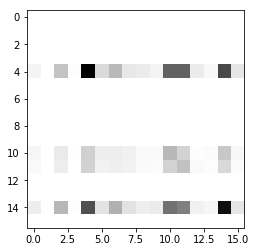

In [68]:
conf = confusion_matrix(predicted, y_test)
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()